In [1]:
# import the python libraries
import pandas as pd  # use perform dataset analysis
import matplotlib.pyplot as plt  # use for creating plots
import numpy as np  # use to perform mathematical functions
import seaborn as sns
from matplotlib.widgets import Cursor  # use to create a cursor to help user choose any input variable
from sklearn.linear_model import LogisticRegression  # use to create and train the model
from sklearn.model_selection import train_test_split  # use to split data use for training and testing
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  # use to evaluate models performance

In [2]:
# read the CSV dataset
df = pd.read_csv('nba_rookie_data.csv')

In [3]:
# view the dataframe
df.head()

,Name,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,...,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [4]:
# drop the 'Name' column
df = df.drop('Name', axis=1)

In [5]:
# view the new dataframe
df.head()

,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


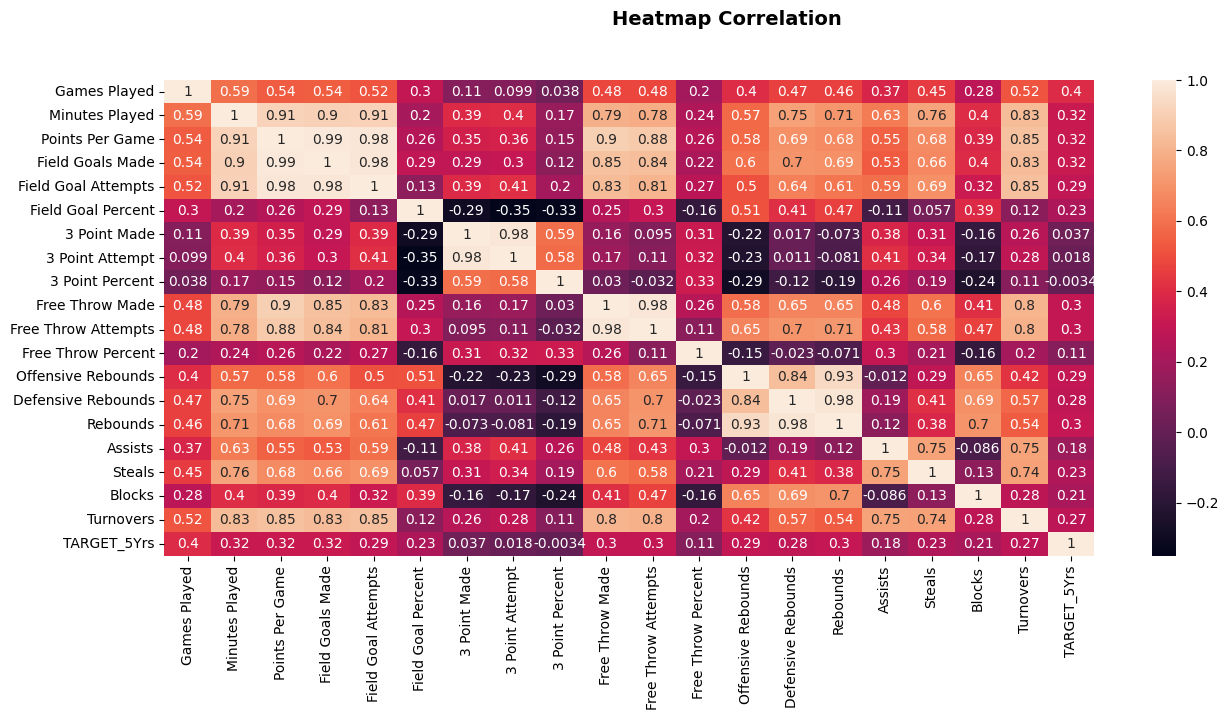

In [6]:
# plot heatmap
fig = plt.figure(figsize=(15, 7))

# title by setting initial sizes
fig.suptitle('Heatmap Correlation', fontsize=14, fontweight='bold')

# plot the heatmap
sns.heatmap(df.corr(), annot=True)

# add a space at the bottom of the plot
fig.subplots_adjust(bottom=0.2)

# display the plot
plt.show()

In [7]:
# declared variables to use
plotCount: int = 0  # use for track slider movement to clear previous plot
line_1 = (0, 0)  # stores the last slider vertical line plot
# read the csv file containing the dataset
df = pd.read_csv('nba_rookie_data.csv')

# display the data head
print(df.head())

# remove null values from dataframe
# df.dropna()

# Display the first five rows
# print(df.head())

              Name  Games Played  Minutes Played  Points Per Game  \
0   Brandon Ingram            36            27.4              7.4   
1  Andrew Harrison            35            26.9              7.2   
2   JaKarr Sampson            74            15.3              5.2   
3      Malik Sealy            58            11.6              5.7   
4      Matt Geiger            48            11.5              4.5   

   Field Goals Made  Field Goal Attempts  Field Goal Percent  3 Point Made  \
0               2.6                  7.6                34.7           0.5   
1               2.0                  6.7                29.6           0.7   
2               2.0                  4.7                42.2           0.4   
3               2.3                  5.5                42.6           0.1   
4               1.6                  3.0                52.4           0.0   

   3 Point Attempt  3 Point Percent  ...  Free Throw Attempts  \
0              2.1             25.0  ...           

In [8]:
########################################
# Function to train model
########################################
def train_model(X, y):
    # split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=1 / 3)
    # build the model
    model = LogisticRegression()
    # train the model
    model.fit(X_train, y_train)
    # find the coefficients
    coef_value = model.coef_[0]
    
    # find the intercept
    intercept = model.intercept_
 
    # find the R^2 value:
    coef_det = r2_score(y_test, model.predict(X_test))
    #
    # GET ALL THE BUILT MODEL EVALUATIONS RESULTS
    #
    # store the models performance text
    result_text = 'Evaluating the logistic regression model: \n' \
                  + 'Coefficients: ' + ', '.join(str(round(e, 1)) for e in coef_value) + '\n' \
                  + 'Intercept: ' + ', '.join(str(round(e, 1)) for e in intercept) + '\n' \
                  + str('Mean squared error (Training): %.1f' % mean_squared_error(y_train, model.predict(X_train))) \
                  + '\n' \
                  + str('Mean squared error (Testing): %.1f' % mean_squared_error(y_test, model.predict(X_test))) \
                  + '\n' \
                  + str('Mean absolute error: %.1f' % mean_absolute_error(y_test, model.predict(X_test))) + '\n' \
                  + str('Coefficient of determination (R^2 score): '
                        + str(round(r2_score(y_test, model.predict(X_test)) * 100, 2)) + ' %' + '\n'
                        + 'Model training Score: ' + str(round(model.score(X_train, y_train) * 100, 1)) + ' %' + '\n'
                        + 'Model testing Score: ' + str(round(model.score(X_test, y_test) * 100, 1)) + ' %')
    # return the trained model and performance
    return model, result_text

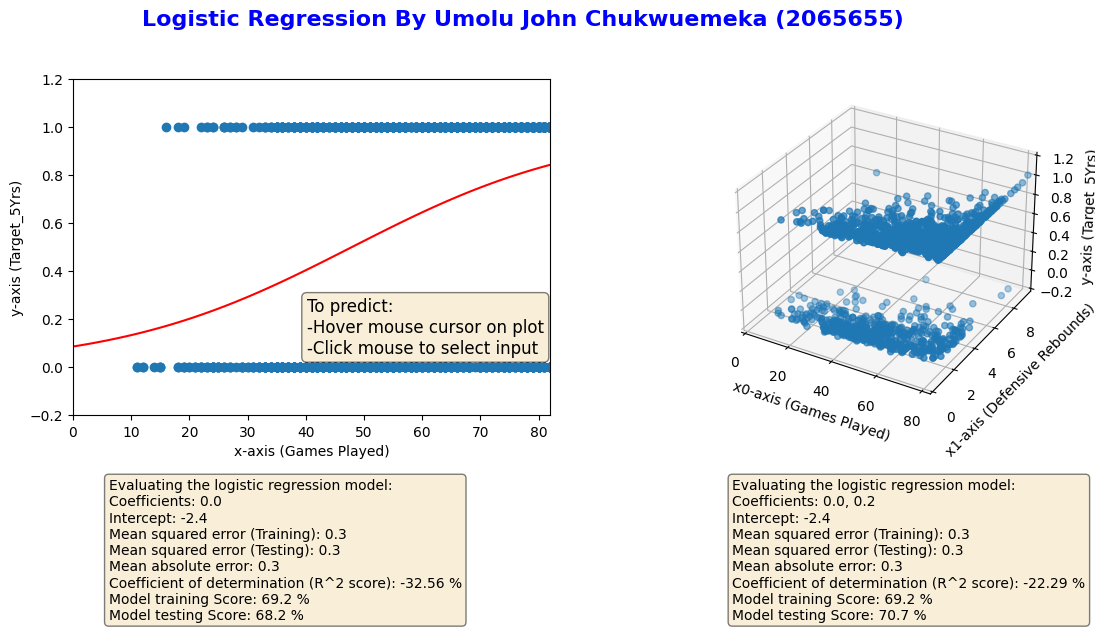

In [9]:
######################################################
# Building the model using one feature
######################################################
# select the index location of the X feature
X = df.iloc[:, [1]].values
# select the index location of the y feature
y = df.iloc[:, -1].values
# call train model function
model, result_text = train_model(X, y)


# Display the model performance on the console
# print(result_text)
fig = plt.figure(figsize=(15, 7))
# display figure suptitle
fig.suptitle('Logistic Regression By Umolu John Chukwuemeka (2065655)', color='blue', fontsize=16, fontweight='bold')
# create box to contain the model performance text using the matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# set the figure title
fig.canvas.manager.set_window_title('Coursework Task 3: Logistic Regression By Umolu John Chukwuemeka (2065655)')
ax1 = fig.add_subplot(121)
x_range = len(X)
Xs = [i for i in range(x_range)]
Ys = [model.predict_proba([[value]])[0][1] for value in range(x_range)]
# Plot the scatter plot
plt.scatter(X, y)
# Plot the sigmoid
plt.plot(Xs, Ys, color='red')
# set the x-axis label
ax1.set_xlabel('x-axis (Games Played)')
# set the y-axis label
ax1.set_ylabel('y-axis (Target_5Yrs)')
# set the minimum and maximum range for x-axis
ax1.set_xlim(0, np.max(np.array(X)))
# set the minimum and maximum range for y-axis
ax1.set_ylim(-0.2, np.max(np.array(y)) + 0.2)
# display model performance at the bottom of the figure
plot_text1 = fig.text(x=ax1.get_position().x0 - 0.05, y=-0.6, s=result_text, fontsize=10,
                      transform=ax1.transAxes, wrap=True, bbox=props)

######################################################
# Adding more features to the model
######################################################
# select the index location of the X feature
X1 = df.iloc[:, [1, 14]].values
# select the index location of the y feature
y1 = df.iloc[:, -1].values
# call train model function
model1, result_text1 = train_model(X1, y1)
# creating new figure
ax2 = fig.add_subplot(122, projection='3d')
#
ax2.scatter(X1[:, 0], X1[:, 1], y1)
# set the x-axis label
ax2.set_xlabel('x0-axis (Games Played)')
# set the y-axis label
ax2.set_ylabel('x1-axis (Defensive Rebounds)')
# set the z-axis label
ax2.set_zlabel('y-axis (Target_5Yrs)')
# set the minimum and maximum range for x-axis
ax2.set_xlim(0, np.max(np.array(X1[:, 0])))
# set the minimum and maximum range for y-axis
ax2.set_ylim(0, np.max(np.array(X1[:, 1])))
# set the minimum and maximum range for z-axis
ax2.set_zlim(-0.2, np.max(np.array(y1)) + 0.2)
# display result on the figure
plot_text2 = fig.text(x=ax2.get_position().x0 - 0.5, y=-0.6, s=result_text1, fontsize=10,
                      transform=ax2.transAxes, wrap=True, bbox=props)


# move the figure up and sideways so that it's not on top of the slider
fig.subplots_adjust(left=0.2, bottom=0.4)

# plot the text box on the figure
pred_legend = ax1.text(0.49, 0.35, 'To predict: \n-Hover mouse cursor on plot\n-Click mouse to select input',
                       fontsize=12, verticalalignment='top', bbox=props, transform=ax1.transAxes)


# function for input prediction
def update_text(input_data, prediction):
    # make variable visible outside the function
    global pred_legend
    # store text to be displayed
    predict_text = 'X Input value: ' + str(input_data) + '\n' + 'Prediction: ' + str(prediction)
    # check if text box plotted already
    if pred_legend is not None:
        # Remove the text box
        pred_legend.remove()
    # display model prediction at the text box
    pred_legend = ax1.text(0.5, 0.35, predict_text, fontsize=12,
                           verticalalignment='top', bbox=props, transform=ax1.transAxes)
    # Display the prediction on the console
    print(predict_text)
    # save figure image
    fig.savefig('logistic_regression.png')
    # return to called location
    return


# function to get mouse clicked position on the plot
def predict_value(event):
    # make variable visible outside the function
    global line_1, plotCount
    # get mouse coordinates
    input_data = event.xdata
    # check if input value is not None
    if input_data is not None:
        # round up input value
        input_data = round(input_data)
        # check if input is greater than 0
        if input_data > 0:
            # predict input
            prediction = model.predict([[input_data]])
            # call text update function
            update_text(input_data, prediction[0])

    # Plot remove routine that removes the previous plotted lines in every 2 counts
    plotCount = plotCount + 1
    if plotCount == 2:
        plotCount = 1
        l1 = line_1.pop(0)
        # remove the vertical and horizontal line tracker
        l1.remove()
    # Plot Vertical Line
    line_1 = ax1.plot([input_data, input_data], [-1.2, np.max(np.array(y)) + 0.2], color='red', linestyle='dashed')
    # Return to called location
    return


# get the mouse hovering position
def graph_hover(event):
    # get mouse coordinates
    input_data = event.xdata
    if input_data is not None:
        ax1.set_title('X Input value: ' + str(round(input_data)))
    # Return to called location
    return


# Detect when mouse is hovered on the graph
mouse_hover = Cursor(ax1, color='r', lw=1, horizOn=False, vertOn=True)
# call function predict_value is called while hovering over the graphs
plt.connect('motion_notify_event', graph_hover)
# call function predict_value is called while clicking over the graphs
plt.connect('button_press_event', predict_value)

# show plot
plt.show()